<a href="https://colab.research.google.com/github/abhinavbhandar/task-1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Problem

Your task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.

Your task is to
1.	Understand the data
2.	Transform categorical variables to the numerical variables
3.	Apply linear regression to predict the CTC
4.	Evaluate the results of the analysis

Excel data files are provided to you to help you with the assignment.
Data_file.xlsx
Data_file is a dataset that you will use to train your model.
Test Data files:
Test_data_file.xlsx

Test_Data_file is a dataset that you will use to test your model and find out the Mean Square Value.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering

In [8]:
train = pd.read_excel("/content/Data_file (1).xlsx",header=2,index_col=0)

In [9]:
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## Statistics Description

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


In [11]:
train.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [12]:
train.describe(include="object")

,College,Role,City type
count,1338,1338,1338
unique,3,2,2
top,Tier 1,Executive,Metro
freq,649,1064,676


# Observation
1) Categorical Variables : College , Role and City type 

2) No Null Values found


# Exploratory Data Analysis

Here we see the count of categorical variables we discussed before to check for any feature engineering requirements.

## Univariate Analysis

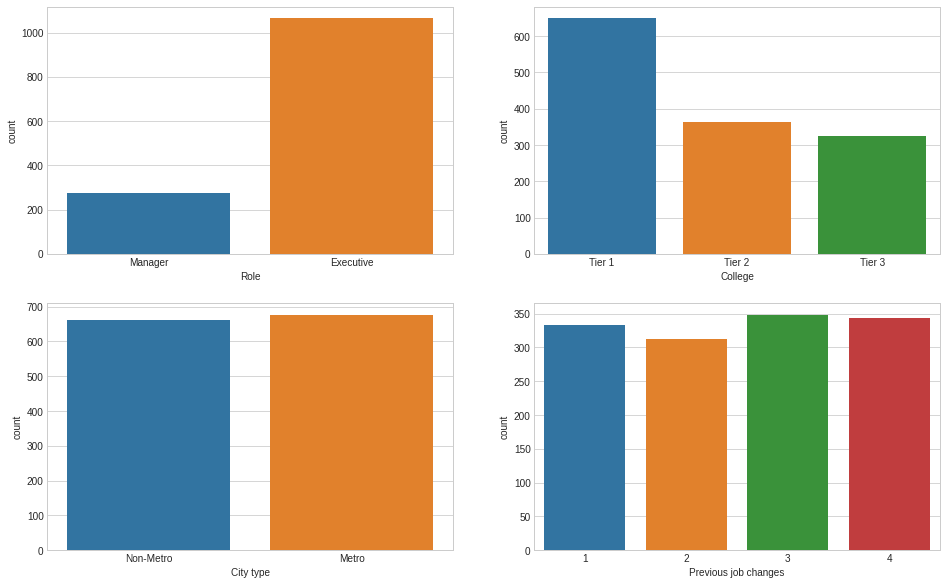

In [13]:
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('seaborn-whitegrid')

#Role variable
plt.subplot(2,2,1)
sns.countplot(x="Role",data=train)

plt.subplot(2,2,2)
sns.countplot(x="College",data=train)

plt.subplot(2,2,3)
sns.countplot(x="City type",data=train)

plt.subplot(2,2,4)
sns.countplot(x="Previous job changes",data=train)

Text(0.5, 1.0, 'City Type\n')

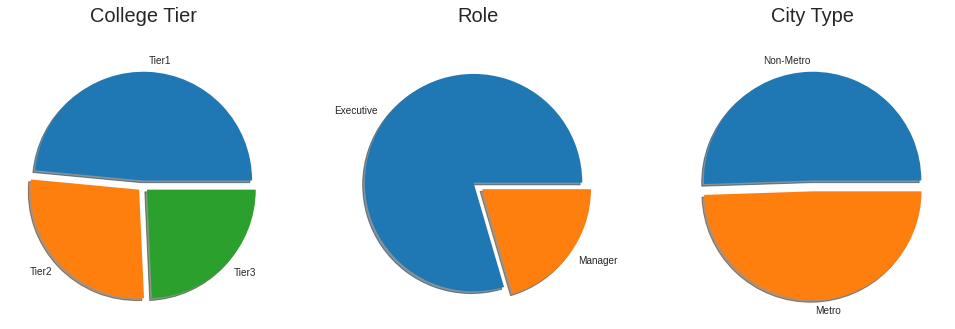

In [14]:
plt.rcParams['figure.figsize'] = (17,5)
plt.style.use('seaborn-whitegrid')

#College Variable
plt.subplot(1,3,1)
plt.pie(x=train.College.value_counts(),labels=["Tier1","Tier2","Tier3"],shadow=True, explode=[0.05,0.05,0.05])
plt.title('College Tier\n',fontsize=20)

#Role Variable
plt.subplot(1,3,2)
plt.pie(x=train.Role.value_counts(),labels=["Executive","Manager"],shadow=True, explode=[0.05,0.05])
plt.title('Role\n',fontsize=20)

#City Type Variable
plt.subplot(1,3,3)
plt.pie(x=train['City type'].value_counts(),labels=["Non-Metro","Metro"],shadow=True, explode=[0.05,0.05])
plt.title("City Type\n",fontsize=20)

## Bivariate Analysis

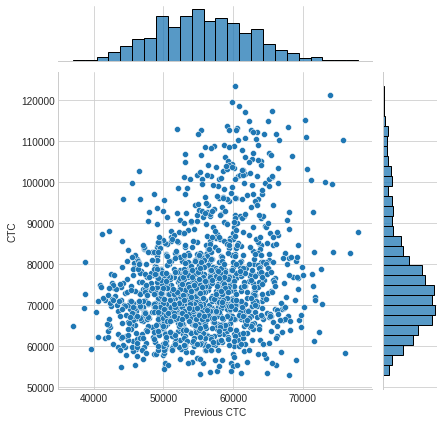

In [15]:
sns.jointplot(x='Previous CTC',y='CTC',data=train)

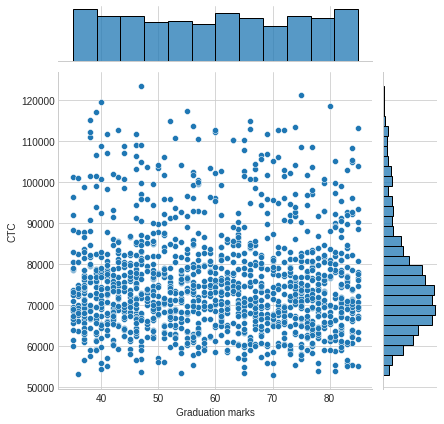

In [16]:
sns.jointplot(x='Graduation marks',y='CTC',data=train)

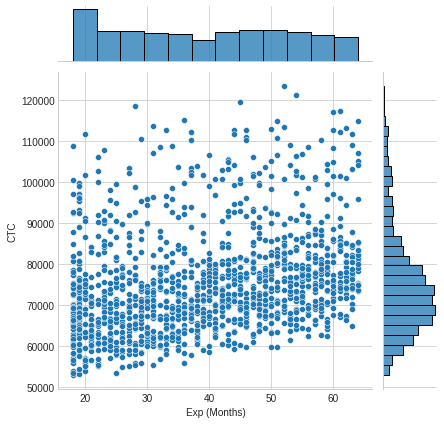

In [17]:
sns.jointplot(x='Exp (Months)',y='CTC',data=train)

# Observation
 All the features are some where important in predicting the CTC.

In [18]:
print(train['Role'].value_counts(), train['College'].value_counts(), train['City type'].value_counts(),sep="\n\n")

Executive    1064
Manager       274
Name: Role, dtype: int64

Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64

Metro        676
Non-Metro    662
Name: City type, dtype: int64


# Dummy Value Creation

In [19]:
train = pd.get_dummies(train,columns=['College','Role','City type'])

In [20]:
train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
S.No.,,,,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,0,0,1,0,1
2,57081,1,84,18,68005.870631,0,1,0,1,0,1,0
3,60347,2,52,28,76764.020277,0,1,0,1,0,1,0
4,49010,2,81,33,82092.386880,0,0,1,1,0,1,0
5,57879,4,74,32,73878.097729,0,0,1,1,0,1,0


In [21]:
del train['College_Tier 3']
del train['Role_Executive']
del train['City type_Non-Metro']

In [22]:
train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
S.No.,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,1,0
2,57081,1,84,18,68005.870631,0,1,0,1
3,60347,2,52,28,76764.020277,0,1,0,1
4,49010,2,81,33,82092.386880,0,0,0,1
5,57879,4,74,32,73878.097729,0,0,0,1


# Observation
Now we have prepared our train dataset for linear regression.
Lets have a look at test dataset to check for features required in testing dataset are matching to training dataset or not.

In [23]:
test = pd.read_csv("/content/Test_data_file.csv",header=0)

In [24]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN


# Observation
 Now we have noticed that Colllege and Role is not required in test dataset.
 
 Also feature names are different in training and testing dataset we have to correct it as well to get a better idea of data.
 
 Some features of training data set is also not required we will remove them as well.

In [25]:
del test['Role']
del test['City type']
del test['College']

In [26]:
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,0,0,0,1,57879,4,74,32,73878.09773,NaN


In [27]:
train.rename(columns={'College_Tier 1': 'College_T1','College_Tier 2': 'College_T2','City type_Metro':'City_Metro',
                   'Previous CTC':'previous CTC','Previous job changes':'previous job changes',
                  'Exp (Months)':'Exp','CTC':'Actual CTC'},inplace=True)

In [28]:
train.head()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_T1,College_T2,Role_Manager,City_Metro
S.No.,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,1,0
2,57081,1,84,18,68005.870631,0,1,0,1
3,60347,2,52,28,76764.020277,0,1,0,1
4,49010,2,81,33,82092.386880,0,0,0,1
5,57879,4,74,32,73878.097729,0,0,0,1


In [29]:
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,0,0,0,1,57879,4,74,32,73878.09773,NaN


In [30]:
Y_test = test['Actual CTC']

In [31]:
test = test[['previous CTC','previous job changes','Graduation marks','Exp','College_T1','College_T2','Role_Manager','City_Metro']]

## Now that we are done with data preprocessing we will now move to finding the correlation in training dataset with the required feature and other

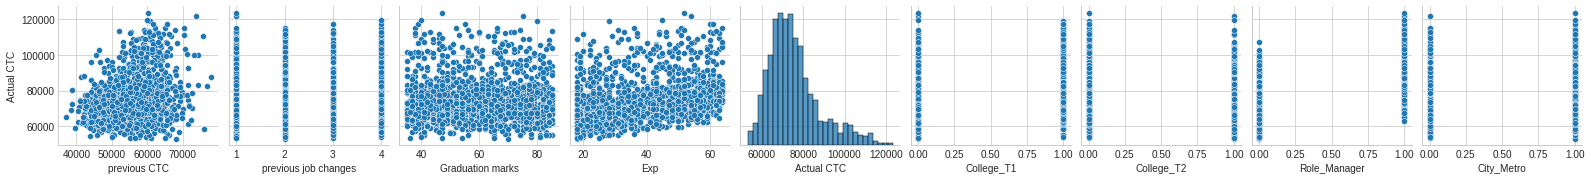

In [32]:
sns.pairplot(train,y_vars='Actual CTC')

In [33]:
# correlation matrix
train.corr()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_T1,College_T2,Role_Manager,City_Metro
previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260,-0.090043,0.232138,0.021208,0.036956
previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518,0.037294,0.008599,-0.013131,-0.001568
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557,0.015750,0.010571,0.014541,0.018550
Exp,0.117035,0.034137,-0.065412,1.000000,0.301569,0.010716,-0.011642,-0.025019,-0.020856
Actual CTC,0.270260,0.007518,-0.017557,0.301569,1.000000,0.165249,-0.041814,0.625435,0.211258
College_T1,-0.090043,0.037294,0.015750,0.010716,0.165249,1.000000,-0.593313,-0.029292,-0.005669
College_T2,0.232138,0.008599,0.010571,-0.011642,-0.041814,-0.593313,1.000000,0.068498,0.017117
Role_Manager,0.021208,-0.013131,0.014541,-0.025019,0.625435,-0.029292,0.068498,1.000000,0.076185
City_Metro,0.036956,-0.001568,0.018550,-0.020856,0.211258,-0.005669,0.017117,0.076185,1.000000


# Model Training

In [34]:
train.shape

(1338, 9)

In [35]:
X=train.drop(columns=['Actual CTC'])
Y = train['Actual CTC']

In [36]:
print("Shape of X table: ",X.shape,"\t",'Shape of Y matrix: ',Y.shape,'Shape of Y_test matrix: ',Y_test.shape)

Shape of X table:  (1338, 8) 	 Shape of Y matrix:  (1338,) Shape of Y_test matrix:  (1338,)


In [37]:
X.columns

Index(['previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'College_T1', 'College_T2', 'Role_Manager', 'City_Metro'],
      dtype='object')

In [38]:
test.columns

Index(['previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'College_T1', 'College_T2', 'Role_Manager', 'City_Metro'],
      dtype='object')

# Linear Regression Model

In [39]:
#Importing sklearn linearregression library
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X,Y)

LinearRegression()

In [42]:
#importing scoring library to check for mse value of the trained model
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Model Evaluation

In [43]:
mean_squared_error(Y_test,model.predict(test))

61677937.04476757